## Libraries and Packages
 - Python version: 3.7.7
 - IPython version: 7.16.1
 - Pandas version: 1.0.5
 - SciKit Learn version: 0.23.1
 - Seaborn version: 0.11.1
 - MatplotLib version: 3.2.2

In [1]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle('preprocessed_df.pkl')

In [3]:
X = df.drop(columns=['cardinal_sym___tremor','cardinal_sym___brady',
                     'cardinal_sym___reflex','cardinal_sym___rigid',
                     'cardinal_sym___asymmetry','parktype_case'])
y_subtype = df['parktype_case']
y_trem = df['cardinal_sym___tremor']
y_brad = df['cardinal_sym___brady']
y_refl = df['cardinal_sym___reflex']
y_rigd = df['cardinal_sym___rigid']
y_asym = df['cardinal_sym___asymmetry']

# 1. Parkinson's disease subtype clustering

## KMeans Clustering

In [4]:
# Determine optimum number of clusters
neighbors = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
sils, cals, davs = list(), list(), list()

for i in neighbors:
    # Cluster filled set for evaluation
    clster = KMeans(n_clusters=i, random_state=10).fit(X)
    labels = clster.predict(X)
    
    # Evaluate
    sil = silhouette_score(X, labels)
    cal = calinski_harabasz_score(X, labels)
    dav = davies_bouldin_score(X, labels)
    
    sils.append(sil)
    cals.append(cal)
    davs.append(dav)

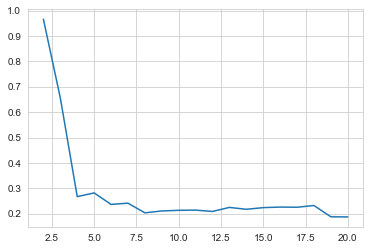

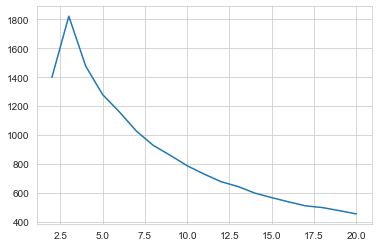

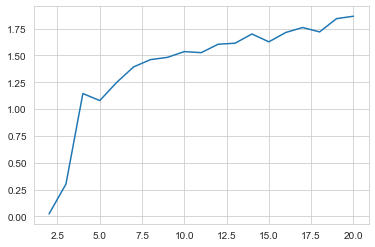

In [5]:
sns.set_style('whitegrid')
# Plot Silhouette Scores vs Cluster Number
sns.lineplot(x=neighbors, y=sils, markers='o')
plt.show()

# Plot Calinski Harabasz Score vs Cluster Number
sns.lineplot(x=neighbors, y=cals, markers='o')
plt.show()

# Plot Davies Bouldin Score vs Cluster Number
sns.lineplot(x=neighbors, y=davs, markers='o')
plt.show()

By the "Elbow Method" for the combined three evaluated metrics with KMeans Clustering, the optimum number of clusters is 4 or 8.

## Hierarchical Clustering (Agglomerative)

In [6]:
# Determine optimum number of clusters
neighbors = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
sils, cals, davs = list(), list(), list()

for i in neighbors:
    # Cluster filled set for evaluation
    clster = AgglomerativeClustering(n_clusters=i).fit(X)
    labels = clster.labels_
    
    # Evaluate
    sil = silhouette_score(X, labels)
    cal = calinski_harabasz_score(X, labels)
    dav = davies_bouldin_score(X, labels)
    
    sils.append(sil)
    cals.append(cal)
    davs.append(dav)

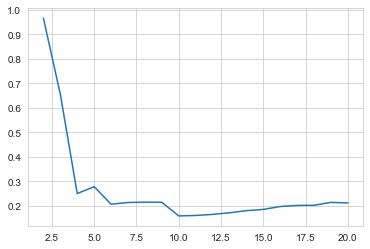

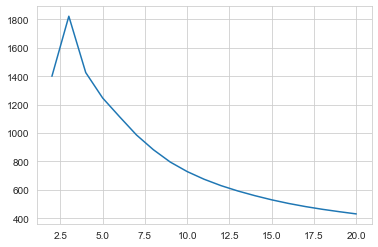

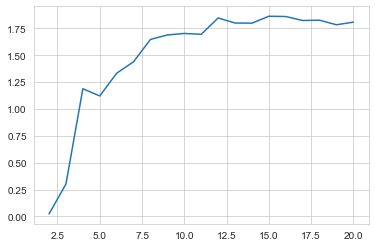

In [7]:
sns.set_style('whitegrid')
# Plot Silhouette Scores vs Cluster Number
sns.lineplot(x=neighbors, y=sils, markers='o')
plt.show()

# Plot Calinski Harabasz Score vs Cluster Number
sns.lineplot(x=neighbors, y=cals, markers='o')
plt.show()

# Plot Davies Bouldin Score vs Cluster Number
sns.lineplot(x=neighbors, y=davs, markers='o')
plt.show()

By the "Elbow Method" for the combined three evaluated metrics with Agglomerative Clustering, the optimum number of clusters is  4 or 10.

## Birch Clustering

In [8]:
# Determine optimum number of clusters
neighbors = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
sils, cals, davs = list(), list(), list()

for i in neighbors:
    # Cluster filled set for evaluation
    clster = Birch(n_clusters=i).fit(X)
    labels = clster.labels_
    
    # Evaluate
    sil = silhouette_score(X, labels)
    cal = calinski_harabasz_score(X, labels)
    dav = davies_bouldin_score(X, labels)
    
    sils.append(sil)
    cals.append(cal)
    davs.append(dav)

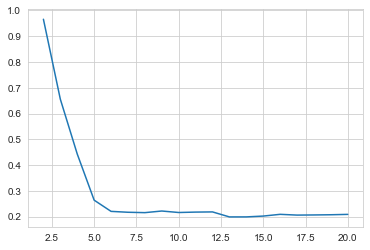

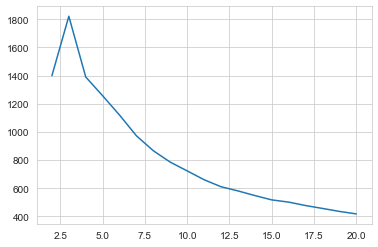

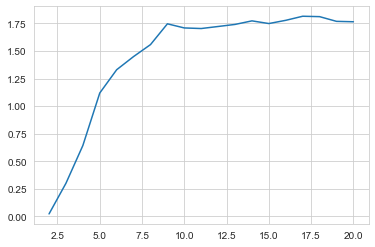

In [9]:
sns.set_style('whitegrid')
# Plot Silhouette Scores vs Cluster Number
sns.lineplot(x=neighbors, y=sils, markers='o')
plt.show()

# Plot Calinski Harabasz Score vs Cluster Number
sns.lineplot(x=neighbors, y=cals, markers='o')
plt.show()

# Plot Davies Bouldin Score vs Cluster Number
sns.lineplot(x=neighbors, y=davs, markers='o')
plt.show()

By the "Elbow Method" for the combined three evaluated metrics with Birch Clustering, the optimum number of clusters is 6.


In [10]:
km4 = KMeans(n_clusters=4, random_state=10).fit(X)
km4_labels = km4.predict(X)
km4_sil = silhouette_score(X, km4_labels)
km4_cal = calinski_harabasz_score(X, km4_labels)
km4_dav = davies_bouldin_score(X, km4_labels)

km8 = KMeans(n_clusters=8, random_state=8).fit(X)
km8_labels = km8.predict(X)
km8_sil = silhouette_score(X, km8_labels)
km8_cal = calinski_harabasz_score(X, km8_labels)
km8_dav = davies_bouldin_score(X, km8_labels)

ac4 = AgglomerativeClustering(n_clusters=4).fit(X)
ac4_labels = ac4.labels_
ac4_sil = silhouette_score(X, ac4_labels)
ac4_cal = calinski_harabasz_score(X, ac4_labels)
ac4_dav = davies_bouldin_score(X, ac4_labels)

ac10 = AgglomerativeClustering(n_clusters=10).fit(X)
ac10_labels = ac10.labels_
ac10_sil = silhouette_score(X, ac10_labels)
ac10_cal = calinski_harabasz_score(X, ac10_labels)
ac10_dav = davies_bouldin_score(X, ac10_labels)

br = Birch(n_clusters=6).fit(X)
br_labels = br.labels_
br_sil = silhouette_score(X, br_labels)
br_cal = calinski_harabasz_score(X, br_labels)
br_dav = davies_bouldin_score(X, br_labels)

print('')
print('KMeans - 4 Clusters')
print('  Silhouette:         '+str(round(km4_sil, 4)))
print('  Calinski Harabasz:  '+str(round(km4_cal, 4)))
print('  Davies Bouldin:     '+str(round(km4_dav, 4)))
print('')
print('KMeans - 8 Clusters')
print('  Silhouette:         '+str(round(km8_sil, 4)))
print('  Calinski Harabasz:  '+str(round(km8_cal, 4)))
print('  Davies Bouldin:     '+str(round(km8_dav, 4)))
print('')
print('Agglomerative Clustering - 4 Clusters')
print('  Silhouette:         '+str(round(ac4_sil, 4)))
print('  Calinski Harabasz:  '+str(round(ac4_cal, 4)))
print('  Davies Bouldin:     '+str(round(ac4_dav, 4)))
print('')
print('Agglomerative Clustering - 10 Clusters')
print('  Silhouette:         '+str(round(ac10_sil, 4)))
print('  Calinski Harabasz:  '+str(round(ac10_cal, 4)))
print('  Davies Bouldin:     '+str(round(ac10_dav, 4)))
print('')
print('Birch Clustering')
print('  Silhouette:         '+str(round(br_sil, 4)))
print('  Calinski Harabasz:  '+str(round(br_cal, 4)))
print('  Davies Bouldin:     '+str(round(br_dav, 4)))
print('')


KMeans - 4 Clusters
  Silhouette:         0.2672
  Calinski Harabasz:  1475.8553
  Davies Bouldin:     1.1443

KMeans - 8 Clusters
  Silhouette:         0.2034
  Calinski Harabasz:  927.885
  Davies Bouldin:     1.4522

Agglomerative Clustering - 4 Clusters
  Silhouette:         0.2504
  Calinski Harabasz:  1425.3735
  Davies Bouldin:     1.1878

Agglomerative Clustering - 10 Clusters
  Silhouette:         0.1592
  Calinski Harabasz:  729.0943
  Davies Bouldin:     1.7024

Birch Clustering
  Silhouette:         0.2207
  Calinski Harabasz:  1119.2655
  Davies Bouldin:     1.3303



When optimized by number of clusters, Agglomerative Clustering with 10 clusters has the best overall metrics.

# Cluster Enrichment by Subtype

In [11]:
results_df = pd.DataFrame()
results_df['parktype_case'] = y_subtype
results_df['tremor'] = y_trem
results_df['brady'] = y_brad
results_df['reflex'] = y_refl
results_df['rigid'] = y_rigd
results_df['asymmetry'] = y_asym
results_df['km4_cluster'] = km4_labels
results_df['km8_cluster'] = km8_labels
results_df['ac4_cluster'] = ac4_labels
results_df['ac10_cluster'] = ac10_labels
results_df['br_cluster'] = br_labels

# Replace string labels with numeric types
results_df['parktype_case'] = results_df['parktype_case'].replace(1,'als_parkinsonism')
results_df['parktype_case'] = results_df['parktype_case'].replace(2,'corticobasal_syndrome')
results_df['parktype_case'] = results_df['parktype_case'].replace(3,'drug_induced_parkinsons_disease')
results_df['parktype_case'] = results_df['parktype_case'].replace(4,'lewy_body_disease')
results_df['parktype_case'] = results_df['parktype_case'].replace(5,'multi_system_atrophy')
results_df['parktype_case'] = results_df['parktype_case'].replace(6,'parkinsons_disease')
results_df['parktype_case'] = results_df['parktype_case'].replace(7,'parkinsons_disease_in_dementia')
results_df['parktype_case'] = results_df['parktype_case'].replace(8,'parkinsons_disease_unspecified_insufficient_data')
results_df['parktype_case'] = results_df['parktype_case'].replace(9,'progressive_supranuclear_palsy')
results_df['parktype_case'] = results_df['parktype_case'].replace(10,'surgical_parkinsons_disease')
results_df['parktype_case'] = results_df['parktype_case'].replace(11,'vascular_parkinsons_disease')

In [12]:
results_df.head()

,parktype_case,tremor,brady,reflex,rigid,asymmetry,km4_cluster,km8_cluster,ac4_cluster,ac10_cluster,br_cluster
0,parkinsons_disease_unspecified_insufficient_data,1.0,1.0,0.0,0.0,0.0,0,4,0,1,1
1,parkinsons_disease,1.0,1.0,0.0,1.0,1.0,0,7,0,3,2
2,parkinsons_disease,0.0,1.0,0.0,1.0,1.0,3,0,0,3,0
3,lewy_body_disease,1.0,1.0,1.0,1.0,1.0,3,0,1,8,0
4,parkinsons_disease_unspecified_insufficient_data,0.0,1.0,1.0,1.0,0.0,0,7,0,3,2


In [13]:
print('Totals')
print('------')
print('Parkinsons Disease:               '+str(list(results_df['parktype_case']).count('parkinsons_disease')))
print('Drug Induced:                     '+str(list(results_df['parktype_case']).count('drug_induced_parkinsons_disease')))
print('Lewy Body:                        '+str(list(results_df['parktype_case']).count('lewy_body_disease')))
print('Multi-system Atrophy:             '+str(list(results_df['parktype_case']).count('multi_system_atrophy')))
print('PD in Dementia:                   '+str(list(results_df['parktype_case']).count('parkinsons_disease_in_dementia')))
print('PD Unspecified:                   '+str(list(results_df['parktype_case']).count('parkinsons_disease_unspecified_insufficient_data')))
print('Progressive Supranuclear Palsy:   '+str(list(results_df['parktype_case']).count('progressive_supranuclear_palsy')))
print('Vascular PD:                      '+str(list(results_df['parktype_case']).count('vascular_parkinsons_disease')))
print('')

Totals
------
Parkinsons Disease:               304
Drug Induced:                     47
Lewy Body:                        81
Multi-system Atrophy:             16
PD in Dementia:                   56
PD Unspecified:                   115
Progressive Supranuclear Palsy:   19
Vascular PD:                      13



### KMeans: n_clusters=4

In [14]:
cls1 = results_df[results_df['km4_cluster'] == 0]
cls2 = results_df[results_df['km4_cluster'] == 1]
cls3 = results_df[results_df['km4_cluster'] == 2]
cls4 = results_df[results_df['km4_cluster'] == 3]

clusters = [cls1, cls2, cls3, cls4]

pkd = 'parkinsons_disease'
di = 'drug_induced_parkinsons_disease'
lb = 'lewy_body_disease'
msa = 'multi_system_atrophy'
dm = 'parkinsons_disease_in_dementia'
unsp = 'parkinsons_disease_unspecified_insufficient_data'
psd = 'progressive_supranuclear_palsy'
vas = 'vascular_parkinsons_disease'

In [15]:
type_pd, type_di, type_lb, type_msa = list(), list(), list(), list()
type_dm, type_unsp, type_psd, type_vas = list(), list(), list(), list()

for i in clusters:
    pd_cnt = list(i['parktype_case']).count(pkd)/list(results_df['parktype_case']).count(pkd)
    di_cnt = list(i['parktype_case']).count(di)/list(results_df['parktype_case']).count(di)
    lb_cnt = list(i['parktype_case']).count(lb)/list(results_df['parktype_case']).count(lb)
    msa_cnt = list(i['parktype_case']).count(msa)/list(results_df['parktype_case']).count(msa)
    dm_cnt = list(i['parktype_case']).count(dm)/list(results_df['parktype_case']).count(dm)
    unsp_cnt = list(i['parktype_case']).count(unsp)/list(results_df['parktype_case']).count(unsp)
    psd_cnt = list(i['parktype_case']).count(psd)/list(results_df['parktype_case']).count(psd)
    vas_cnt = list(i['parktype_case']).count(vas)/list(results_df['parktype_case']).count(vas)
    
    type_pd.append(pd_cnt)
    type_di.append(di_cnt)
    type_lb.append(lb_cnt)
    type_msa.append(msa_cnt)
    type_dm.append(dm_cnt)
    type_unsp.append(unsp_cnt)
    type_psd.append(psd_cnt)
    type_vas.append(vas_cnt)

In [16]:
# Initialize density dataframe and populate it
density_df = pd.DataFrame()
density_df['Parkinsons Disease'] = type_pd
density_df['Drug Induced'] = type_di
density_df['Lewy Body'] = type_lb
density_df['Multi-system Atrophy'] = type_msa
density_df['PD in Dementia'] = type_dm
density_df['PD Unspecified'] = type_unsp
density_df['Progressive Supranuclear Palsy'] = type_psd
density_df['Vascular PD'] = type_vas

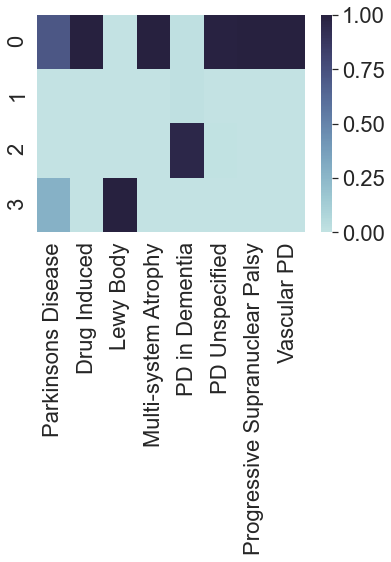

In [17]:
sns.set(font_scale=2)
maps = sns.color_palette('ch:start=.2,rot=-.3', as_cmap=True)
sns.heatmap(density_df, cmap=maps)
plt.savefig('KMeans_PD_Subtype_clustering_4.png', dpi=300)
plt.savefig('KMeans_PD_Subtype_clustering_4.pdf', dpi=300)

### KMeans: n_clusters=8

In [18]:
cls1 = results_df[results_df['km8_cluster'] == 0]
cls2 = results_df[results_df['km8_cluster'] == 1]
cls3 = results_df[results_df['km8_cluster'] == 2]
cls4 = results_df[results_df['km8_cluster'] == 3]
cls5 = results_df[results_df['km8_cluster'] == 4]
cls6 = results_df[results_df['km8_cluster'] == 5]
cls7 = results_df[results_df['km8_cluster'] == 6]
cls8 = results_df[results_df['km8_cluster'] == 7]

clusters = [cls1, cls2, cls3, cls4, cls5, cls6, cls7, cls8]

type_pd, type_di, type_lb, type_msa = list(), list(), list(), list()
type_dm, type_unsp, type_psd, type_vas = list(), list(), list(), list()

for i in clusters:
    pd_cnt = list(i['parktype_case']).count(pkd)/list(results_df['parktype_case']).count(pkd)
    di_cnt = list(i['parktype_case']).count(di)/list(results_df['parktype_case']).count(di)
    lb_cnt = list(i['parktype_case']).count(lb)/list(results_df['parktype_case']).count(lb)
    msa_cnt = list(i['parktype_case']).count(msa)/list(results_df['parktype_case']).count(msa)
    dm_cnt = list(i['parktype_case']).count(dm)/list(results_df['parktype_case']).count(dm)
    unsp_cnt = list(i['parktype_case']).count(unsp)/list(results_df['parktype_case']).count(unsp)
    psd_cnt = list(i['parktype_case']).count(psd)/list(results_df['parktype_case']).count(psd)
    vas_cnt = list(i['parktype_case']).count(vas)/list(results_df['parktype_case']).count(vas)
    
    type_pd.append(pd_cnt)
    type_di.append(di_cnt)
    type_lb.append(lb_cnt)
    type_msa.append(msa_cnt)
    type_dm.append(dm_cnt)
    type_unsp.append(unsp_cnt)
    type_psd.append(psd_cnt)
    type_vas.append(vas_cnt)

In [19]:
# Initialize density dataframe and populate it
density_df = pd.DataFrame()
density_df['Parkinsons Disease'] = type_pd
density_df['Drug Induced'] = type_di
density_df['Lewy Body'] = type_lb
density_df['Multi-system Atrophy'] = type_msa
density_df['PD in Dementia'] = type_dm
density_df['PD Unspecified'] = type_unsp
density_df['Progressive Supranuclear Palsy'] = type_psd
density_df['Vascular PD'] = type_vas

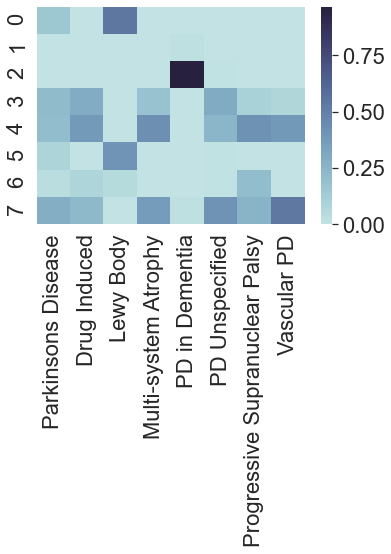

In [20]:
sns.set(font_scale=2)
maps = sns.color_palette('ch:start=.2,rot=-.3', as_cmap=True)
sns.heatmap(density_df, cmap=maps)
plt.savefig('KMeans_PD_Subtype_clustering_8.png', dpi=300)
plt.savefig('KMeans_PD_Subtype_clustering_8.pdf', dpi=300)

### Agglomerative Clustering: n_clusters=4

In [21]:
cls1 = results_df[results_df['ac4_cluster'] == 0]
cls2 = results_df[results_df['ac4_cluster'] == 1]
cls3 = results_df[results_df['ac4_cluster'] == 2]
cls4 = results_df[results_df['ac4_cluster'] == 3]

clusters = [cls1, cls2, cls3, cls4]

pkd = 'parkinsons_disease'
di = 'drug_induced_parkinsons_disease'
lb = 'lewy_body_disease'
msa = 'multi_system_atrophy'
dm = 'parkinsons_disease_in_dementia'
unsp = 'parkinsons_disease_unspecified_insufficient_data'
psd = 'progressive_supranuclear_palsy'
vas = 'vascular_parkinsons_disease'

In [22]:
type_pd, type_di, type_lb, type_msa = list(), list(), list(), list()
type_dm, type_unsp, type_psd, type_vas = list(), list(), list(), list()

for i in clusters:
    pd_cnt = list(i['parktype_case']).count(pkd)/list(results_df['parktype_case']).count(pkd)
    di_cnt = list(i['parktype_case']).count(di)/list(results_df['parktype_case']).count(di)
    lb_cnt = list(i['parktype_case']).count(lb)/list(results_df['parktype_case']).count(lb)
    msa_cnt = list(i['parktype_case']).count(msa)/list(results_df['parktype_case']).count(msa)
    dm_cnt = list(i['parktype_case']).count(dm)/list(results_df['parktype_case']).count(dm)
    unsp_cnt = list(i['parktype_case']).count(unsp)/list(results_df['parktype_case']).count(unsp)
    psd_cnt = list(i['parktype_case']).count(psd)/list(results_df['parktype_case']).count(psd)
    vas_cnt = list(i['parktype_case']).count(vas)/list(results_df['parktype_case']).count(vas)
    
    type_pd.append(pd_cnt)
    type_di.append(di_cnt)
    type_lb.append(lb_cnt)
    type_msa.append(msa_cnt)
    type_dm.append(dm_cnt)
    type_unsp.append(unsp_cnt)
    type_psd.append(psd_cnt)
    type_vas.append(vas_cnt)

In [23]:
# Initialize density dataframe and populate it
density_df = pd.DataFrame()
density_df['Parkinsons Disease'] = type_pd
density_df['Drug Induced'] = type_di
density_df['Lewy Body'] = type_lb
density_df['Multi-system Atrophy'] = type_msa
density_df['PD in Dementia'] = type_dm
density_df['PD Unspecified'] = type_unsp
density_df['Progressive Supranuclear Palsy'] = type_psd
density_df['Vascular PD'] = type_vas

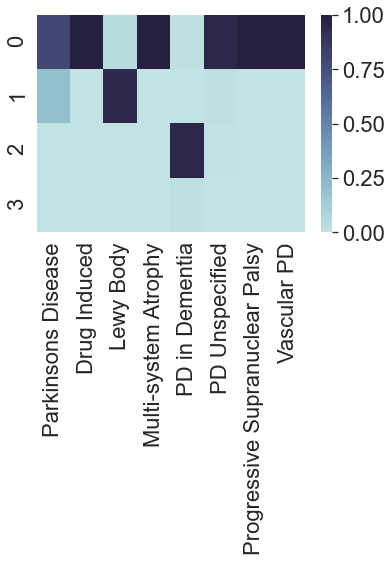

In [24]:
sns.set(font_scale=2)
maps = sns.color_palette('ch:start=.2,rot=-.3', as_cmap=True)
sns.heatmap(density_df, cmap=maps)
plt.savefig('Agglomerative_PD_Subtype_clustering_4.png', dpi=300)
plt.savefig('Agglomerative_PD_Subtype_clustering_4.pdf', dpi=300)

### Agglomerative Clustering: n_clusters=10

In [25]:
cls1 = results_df[results_df['ac10_cluster'] == 0]
cls2 = results_df[results_df['ac10_cluster'] == 1]
cls3 = results_df[results_df['ac10_cluster'] == 2]
cls4 = results_df[results_df['ac10_cluster'] == 3]
cls5 = results_df[results_df['ac10_cluster'] == 4]
cls6 = results_df[results_df['ac10_cluster'] == 5]
cls7 = results_df[results_df['ac10_cluster'] == 6]
cls8 = results_df[results_df['ac10_cluster'] == 7]
cls9 = results_df[results_df['ac10_cluster'] == 8]
cls10 = results_df[results_df['ac10_cluster'] == 9]

clusters = [cls1, cls2, cls3, cls4, cls5, cls6, cls7, cls8, cls9, cls10]

type_pd, type_di, type_lb, type_msa = list(), list(), list(), list()
type_dm, type_unsp, type_psd, type_vas = list(), list(), list(), list()

for i in clusters:
    pd_cnt = list(i['parktype_case']).count(pkd)/list(results_df['parktype_case']).count(pkd)
    di_cnt = list(i['parktype_case']).count(di)/list(results_df['parktype_case']).count(di)
    lb_cnt = list(i['parktype_case']).count(lb)/list(results_df['parktype_case']).count(lb)
    msa_cnt = list(i['parktype_case']).count(msa)/list(results_df['parktype_case']).count(msa)
    dm_cnt = list(i['parktype_case']).count(dm)/list(results_df['parktype_case']).count(dm)
    unsp_cnt = list(i['parktype_case']).count(unsp)/list(results_df['parktype_case']).count(unsp)
    psd_cnt = list(i['parktype_case']).count(psd)/list(results_df['parktype_case']).count(psd)
    vas_cnt = list(i['parktype_case']).count(vas)/list(results_df['parktype_case']).count(vas)
    
    type_pd.append(pd_cnt)
    type_di.append(di_cnt)
    type_lb.append(lb_cnt)
    type_msa.append(msa_cnt)
    type_dm.append(dm_cnt)
    type_unsp.append(unsp_cnt)
    type_psd.append(psd_cnt)
    type_vas.append(vas_cnt)

In [26]:
# Initialize density dataframe and populate it
density_df = pd.DataFrame()
density_df['Parkinsons Disease'] = type_pd
density_df['Drug Induced'] = type_di
density_df['Lewy Body'] = type_lb
density_df['Multi-system Atrophy'] = type_msa
density_df['PD in Dementia'] = type_dm
density_df['PD Unspecified'] = type_unsp
density_df['Progressive Supranuclear Palsy'] = type_psd
density_df['Vascular PD'] = type_vas

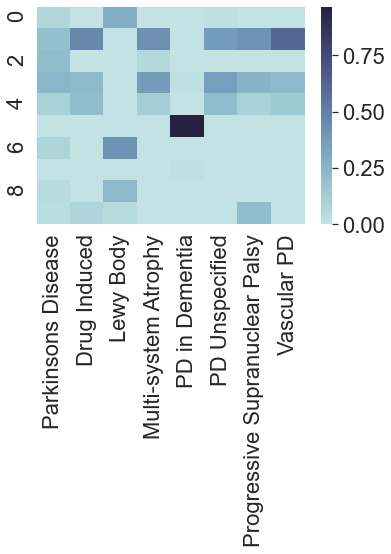

In [27]:
sns.set(font_scale=2)
maps = sns.color_palette('ch:start=.2,rot=-.3', as_cmap=True)
sns.heatmap(density_df, cmap=maps)
plt.savefig('Agglomerative_PD_Subtype_clustering_10.png', dpi=300)
plt.savefig('Agglomerative_PD_Subtype_clustering_10.pdf', dpi=300)

### Birch Clustering: n_clusters=6

In [28]:
cls1 = results_df[results_df['br_cluster'] == 0]
cls2 = results_df[results_df['br_cluster'] == 1]
cls3 = results_df[results_df['br_cluster'] == 2]
cls4 = results_df[results_df['br_cluster'] == 3]
cls5 = results_df[results_df['br_cluster'] == 4]
cls6 = results_df[results_df['br_cluster'] == 5]

clusters = [cls1, cls2, cls3, cls4, cls5, cls6]

pkd = 'parkinsons_disease'
di = 'drug_induced_parkinsons_disease'
lb = 'lewy_body_disease'
msa = 'multi_system_atrophy'
dm = 'parkinsons_disease_in_dementia'
unsp = 'parkinsons_disease_unspecified_insufficient_data'
psd = 'progressive_supranuclear_palsy'
vas = 'vascular_parkinsons_disease'

In [29]:
type_pd, type_di, type_lb, type_msa = list(), list(), list(), list()
type_dm, type_unsp, type_psd, type_vas = list(), list(), list(), list()

for i in clusters:
    pd_cnt = list(i['parktype_case']).count(pkd)/list(results_df['parktype_case']).count(pkd)
    di_cnt = list(i['parktype_case']).count(di)/list(results_df['parktype_case']).count(di)
    lb_cnt = list(i['parktype_case']).count(lb)/list(results_df['parktype_case']).count(lb)
    msa_cnt = list(i['parktype_case']).count(msa)/list(results_df['parktype_case']).count(msa)
    dm_cnt = list(i['parktype_case']).count(dm)/list(results_df['parktype_case']).count(dm)
    unsp_cnt = list(i['parktype_case']).count(unsp)/list(results_df['parktype_case']).count(unsp)
    psd_cnt = list(i['parktype_case']).count(psd)/list(results_df['parktype_case']).count(psd)
    vas_cnt = list(i['parktype_case']).count(vas)/list(results_df['parktype_case']).count(vas)
    
    type_pd.append(pd_cnt)
    type_di.append(di_cnt)
    type_lb.append(lb_cnt)
    type_msa.append(msa_cnt)
    type_dm.append(dm_cnt)
    type_unsp.append(unsp_cnt)
    type_psd.append(psd_cnt)
    type_vas.append(vas_cnt)

In [30]:
# Initialize density dataframe and populate it
density_df = pd.DataFrame()
density_df['Parkinsons Disease'] = type_pd
density_df['Drug Induced'] = type_di
density_df['Lewy Body'] = type_lb
density_df['Multi-system Atrophy'] = type_msa
density_df['PD in Dementia'] = type_dm
density_df['PD Unspecified'] = type_unsp
density_df['Progressive Supranuclear Palsy'] = type_psd
density_df['Vascular PD'] = type_vas

In [ ]:
sns.set(font_scale=2)
maps = sns.color_palette('ch:start=.2,rot=-.3', as_cmap=True)
sns.heatmap(density_df, cmap=maps)
plt.savefig('Birch_PD_Subtype_clustering.png', dpi=300)
plt.savefig('Birch_PD_Subtype_clustering.pdf', dpi=300)

# Cluster Enrichment by Cardinal Symptoms

## KMeans

In [ ]:
results_df.head()

In [ ]:
cls1 = results_df[results_df['km4_cluster'] == 0]
cls2 = results_df[results_df['km4_cluster'] == 1]
cls3 = results_df[results_df['km4_cluster'] == 2]
cls4 = results_df[results_df['km4_cluster'] == 3]

clusters = [cls1, cls2, cls3, cls4]

In [ ]:
trmr, brdy, rflx, rgd, asym = list(), list(), list(), list(), list()

for i in clusters:
    trmr_cnt = list(i['tremor']).count(1.0)/list(results_df['tremor']).count(1.0)
    brdy_cnt = list(i['brady']).count(1.0)/list(results_df['brady']).count(1.0)
    rflx_cnt = list(i['reflex']).count(1.0)/list(results_df['reflex']).count(1.0)
    rgd_cnt = list(i['rigid']).count(1.0)/list(results_df['rigid']).count(1.0)
    asym_cnt = list(i['asymmetry']).count(1.0)/list(results_df['asymmetry']).count(1.0)
    
    trmr.append(trmr_cnt)
    brdy.append(brdy_cnt)
    rflx.append(rflx_cnt)
    rgd.append(rgd_cnt)
    asym.append(asym_cnt)

In [ ]:
# Initialize density dataframe and populate it
density_df = pd.DataFrame()
density_df['Tremor'] = trmr
density_df['Brady'] = brdy
density_df['Reflex'] = rflx
density_df['Rigid'] = rgd
density_df['Asymmetry'] = asym

In [ ]:
sns.set(font_scale=2)
maps = sns.color_palette('ch:start=.2,rot=-.3', as_cmap=True)
sns.heatmap(density_df, cmap=maps)
plt.savefig('KMeans_cardinal_clustering_4.png', dpi=300)
plt.savefig('KMeans_cardinal_clustering_4.pdf', dpi=300)

In [ ]:
cls1 = results_df[results_df['km8_cluster'] == 0]
cls2 = results_df[results_df['km8_cluster'] == 1]
cls3 = results_df[results_df['km8_cluster'] == 2]
cls4 = results_df[results_df['km8_cluster'] == 3]
cls5 = results_df[results_df['km8_cluster'] == 4]
cls6 = results_df[results_df['km8_cluster'] == 5]
cls7 = results_df[results_df['km8_cluster'] == 6]
cls8 = results_df[results_df['km8_cluster'] == 7]

clusters = [cls1, cls2, cls3, cls4, cls5, cls6, cls7, cls8]

trmr, brdy, rflx, rgd, asym = list(), list(), list(), list(), list()

for i in clusters:
    trmr_cnt = list(i['tremor']).count(1.0)/list(results_df['tremor']).count(1.0)
    brdy_cnt = list(i['brady']).count(1.0)/list(results_df['brady']).count(1.0)
    rflx_cnt = list(i['reflex']).count(1.0)/list(results_df['reflex']).count(1.0)
    rgd_cnt = list(i['rigid']).count(1.0)/list(results_df['rigid']).count(1.0)
    asym_cnt = list(i['asymmetry']).count(1.0)/list(results_df['asymmetry']).count(1.0)
    
    trmr.append(trmr_cnt)
    brdy.append(brdy_cnt)
    rflx.append(rflx_cnt)
    rgd.append(rgd_cnt)
    asym.append(asym_cnt)

In [ ]:
# Initialize density dataframe and populate it
density_df = pd.DataFrame()
density_df['Tremor'] = trmr
density_df['Brady'] = brdy
density_df['Reflex'] = rflx
density_df['Rigid'] = rgd
density_df['Asymmetry'] = asym

In [ ]:
sns.set(font_scale=2)
maps = sns.color_palette('ch:start=.2,rot=-.3', as_cmap=True)
sns.heatmap(density_df, cmap=maps)
plt.savefig('KMeans_cardinal_clustering_8.png', dpi=300)
plt.savefig('KMeans_cardinal_clustering_8.pdf', dpi=300)

## Agglomerative Clustering

In [ ]:
cls1 = results_df[results_df['ac4_cluster'] == 0]
cls2 = results_df[results_df['ac4_cluster'] == 1]
cls3 = results_df[results_df['ac4_cluster'] == 2]
cls4 = results_df[results_df['ac4_cluster'] == 3]

clusters = [cls1, cls2, cls3, cls4]

In [ ]:
trmr, brdy, rflx, rgd, asym = list(), list(), list(), list(), list()

for i in clusters:
    trmr_cnt = list(i['tremor']).count(1.0)/list(results_df['tremor']).count(1.0)
    brdy_cnt = list(i['brady']).count(1.0)/list(results_df['brady']).count(1.0)
    rflx_cnt = list(i['reflex']).count(1.0)/list(results_df['reflex']).count(1.0)
    rgd_cnt = list(i['rigid']).count(1.0)/list(results_df['rigid']).count(1.0)
    asym_cnt = list(i['asymmetry']).count(1.0)/list(results_df['asymmetry']).count(1.0)
    
    trmr.append(trmr_cnt)
    brdy.append(brdy_cnt)
    rflx.append(rflx_cnt)
    rgd.append(rgd_cnt)
    asym.append(asym_cnt)

In [ ]:
# Initialize density dataframe and populate it
density_df = pd.DataFrame()
density_df['Tremor'] = trmr
density_df['Brady'] = brdy
density_df['Reflex'] = rflx
density_df['Rigid'] = rgd
density_df['Asymmetry'] = asym

In [ ]:
sns.set(font_scale=2)
maps = sns.color_palette('ch:start=.2,rot=-.3', as_cmap=True)
sns.heatmap(density_df, cmap=maps)
plt.savefig('Agglomerative_cardinal_clustering_4.png', dpi=300)
plt.savefig('Agglomerative_cardinal_clustering_4.pdf', dpi=300)

In [ ]:
cls1 = results_df[results_df['ac10_cluster'] == 0]
cls2 = results_df[results_df['ac10_cluster'] == 1]
cls3 = results_df[results_df['ac10_cluster'] == 2]
cls4 = results_df[results_df['ac10_cluster'] == 3]
cls5 = results_df[results_df['ac10_cluster'] == 4]
cls6 = results_df[results_df['ac10_cluster'] == 5]
cls7 = results_df[results_df['ac10_cluster'] == 6]
cls8 = results_df[results_df['ac10_cluster'] == 7]
cls9 = results_df[results_df['ac10_cluster'] == 8]
cls10 = results_df[results_df['ac10_cluster'] == 9]

clusters = [cls1, cls2, cls3, cls4, cls5, cls6, cls7, cls8, cls9, cls10]

trmr, brdy, rflx, rgd, asym = list(), list(), list(), list(), list()

for i in clusters:
    trmr_cnt = list(i['tremor']).count(1.0)/list(results_df['tremor']).count(1.0)
    brdy_cnt = list(i['brady']).count(1.0)/list(results_df['brady']).count(1.0)
    rflx_cnt = list(i['reflex']).count(1.0)/list(results_df['reflex']).count(1.0)
    rgd_cnt = list(i['rigid']).count(1.0)/list(results_df['rigid']).count(1.0)
    asym_cnt = list(i['asymmetry']).count(1.0)/list(results_df['asymmetry']).count(1.0)
    
    trmr.append(trmr_cnt)
    brdy.append(brdy_cnt)
    rflx.append(rflx_cnt)
    rgd.append(rgd_cnt)
    asym.append(asym_cnt)

In [ ]:
# Initialize density dataframe and populate it
density_df = pd.DataFrame()
density_df['Tremor'] = trmr
density_df['Brady'] = brdy
density_df['Reflex'] = rflx
density_df['Rigid'] = rgd
density_df['Asymmetry'] = asym

In [ ]:
sns.set(font_scale=2)
maps = sns.color_palette('ch:start=.2,rot=-.3', as_cmap=True)
sns.heatmap(density_df, cmap=maps)
plt.savefig('Agglomerative_cardinal_clustering_10.png', dpi=300)
plt.savefig('Agglomerative_cardinal_clustering_10.pdf', dpi=300)

## Birch Clustering

In [ ]:
cls1 = results_df[results_df['br_cluster'] == 0]
cls2 = results_df[results_df['br_cluster'] == 1]
cls3 = results_df[results_df['br_cluster'] == 2]
cls4 = results_df[results_df['br_cluster'] == 3]
cls5 = results_df[results_df['br_cluster'] == 4]
cls6 = results_df[results_df['br_cluster'] == 5]

clusters = [cls1, cls2, cls3, cls4, cls5, cls6]

In [ ]:
trmr, brdy, rflx, rgd, asym = list(), list(), list(), list(), list()

for i in clusters:
    trmr_cnt = list(i['tremor']).count(1.0)/list(results_df['tremor']).count(1.0)
    brdy_cnt = list(i['brady']).count(1.0)/list(results_df['brady']).count(1.0)
    rflx_cnt = list(i['reflex']).count(1.0)/list(results_df['reflex']).count(1.0)
    rgd_cnt = list(i['rigid']).count(1.0)/list(results_df['rigid']).count(1.0)
    asym_cnt = list(i['asymmetry']).count(1.0)/list(results_df['asymmetry']).count(1.0)
    
    trmr.append(trmr_cnt)
    brdy.append(brdy_cnt)
    rflx.append(rflx_cnt)
    rgd.append(rgd_cnt)
    asym.append(asym_cnt)

In [ ]:
# Initialize density dataframe and populate it
density_df = pd.DataFrame()
density_df['Tremor'] = trmr
density_df['Brady'] = brdy
density_df['Reflex'] = rflx
density_df['Rigid'] = rgd
density_df['Asymmetry'] = asym

In [ ]:
sns.set(font_scale=2)
maps = sns.color_palette('ch:start=.2,rot=-.3', as_cmap=True)
sns.heatmap(density_df, cmap=maps)
plt.savefig('Birch_cardinal_clustering.png', dpi=300)
plt.savefig('Birch_cardinal_clustering.pdf', dpi=300)

# Add cluster labels from agglomerative clustering to final DataFrame to be used as a feature for a classification algorithm

In [ ]:
final_df = df
final_df['Agglomerative_Clustering_Subtype_Labels'] = results_df['ac10_cluster']

In [ ]:
final_df.to_pickle('preprocessed_df_with_cluster_names.pkl')